## Data Understanding
a. Import library dan Load Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = '/workspaces/codespaces-jupyter/data/raw/datasayur.csv'
data = pd.read_csv(file_path)

# Konversi 'Tanggal Harga' ke datetime, tangani format tanggal yang tidak konsisten
data['Tanggal Harga'] = pd.to_datetime(data['Tanggal Harga'], dayfirst=True, errors='coerce')

# Hapus baris dengan tanggal tidak valid
data = data.dropna(subset=['Tanggal Harga'])

# Ekstrak fitur dari tanggal
data['Year'] = data['Tanggal Harga'].dt.year
data['Month'] = data['Tanggal Harga'].dt.month

data.head()


/tmp/ipykernel_2419/2952598210.py:11: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Tanggal Harga'] = pd.to_datetime(data['Tanggal Harga'], dayfirst=True, errors='coerce')


,ID,Jenis Sayuran,Tanggal Harga,Musim,Harga Beli Pengepul per Kilogram,Year,Month
0,1,Sawi Putih,2021-01-01,Hujan,3500,2021,1
1,2,Cabe Chilli,2021-01-01,Hujan,20800,2021,1
2,3,Cabe Kriting,2021-01-01,Hujan,34200,2021,1
3,4,Cabe Rawit,2021-01-01,Hujan,52800,2021,1
4,5,Kol,2021-01-01,Hujan,1800,2021,1


### Menambah data baru

In [3]:
# Adding 10-15% to 'Harga Beli Pengepul per Kilogram' to generate new 'Harga Beli Pasar per Kilogram'
data['Harga Beli Pasar per Kilogram'] = data['Harga Beli Pengepul per Kilogram'] * (1 + np.random.uniform(0.10, 0.15, len(data)))

# Round the new values to the nearest whole number
data['Harga Beli Pasar per Kilogram'] = data['Harga Beli Pasar per Kilogram'].round()


# Show the first few rows to verify the changes
data.head()


,ID,Jenis Sayuran,Tanggal Harga,Musim,Harga Beli Pengepul per Kilogram,Year,Month,Harga Beli Pasar per Kilogram
0,1,Sawi Putih,2021-01-01,Hujan,3500,2021,1,3908.0
1,2,Cabe Chilli,2021-01-01,Hujan,20800,2021,1,23767.0
2,3,Cabe Kriting,2021-01-01,Hujan,34200,2021,1,38557.0
3,4,Cabe Rawit,2021-01-01,Hujan,52800,2021,1,58526.0
4,5,Kol,2021-01-01,Hujan,1800,2021,1,2005.0


In [4]:
#Pembulatan harga beli pasar
# Round 'Harga Beli Pasar per Kilogram' to the nearest hundred
data['Harga Beli Pasar per Kilogram'] = data['Harga Beli Pasar per Kilogram'].round(-2)

data.head

<bound method NDFrame.head of         ID Jenis Sayuran Tanggal Harga  Musim  \
0        1    Sawi Putih    2021-01-01  Hujan   
1        2   Cabe Chilli    2021-01-01  Hujan   
2        3  Cabe Kriting    2021-01-01  Hujan   
3        4    Cabe Rawit    2021-01-01  Hujan   
4        5           Kol    2021-01-01  Hujan   
...    ...           ...           ...    ...   
6565  6566   Cabe Chilli    2023-12-31  Hujan   
6566  6567  Cabe Kriting    2023-12-31  Hujan   
6567  6568    Cabe Rawit    2023-12-31  Hujan   
6568  6569           Kol    2023-12-31  Hujan   
6569  6570        Buncis    2023-12-31  Hujan   

      Harga Beli Pengepul per Kilogram  Year  Month  \
0                                 3500  2021      1   
1                                20800  2021      1   
2                                34200  2021      1   
3                                52800  2021      1   
4                                 1800  2021      1   
...                                ...   ...    ...

b. Visualisasi Distribusi Harga

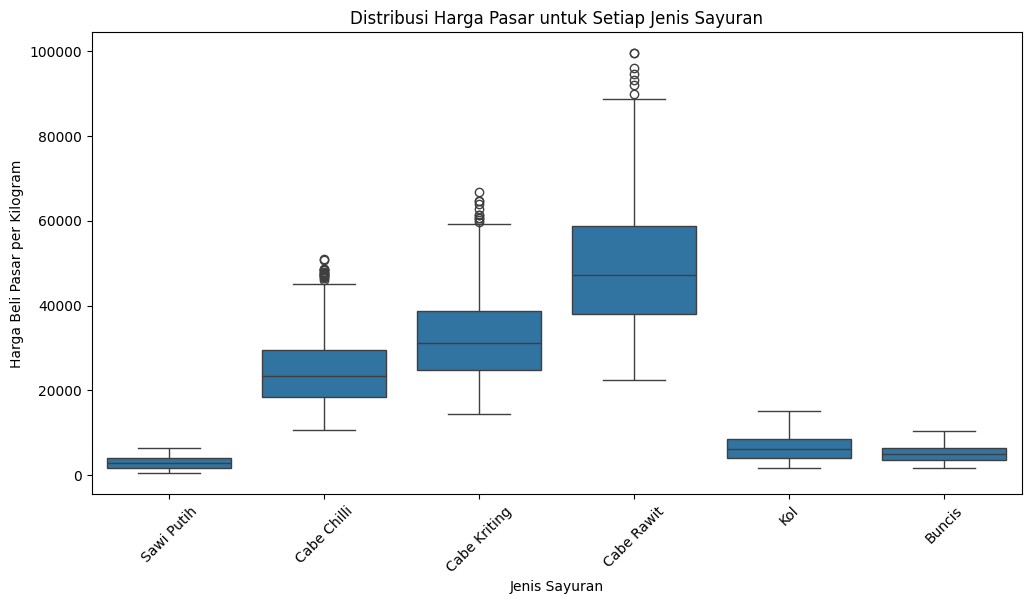

In [5]:
# Plot distribusi harga pasar untuk setiap jenis sayuran
plt.figure(figsize=(12, 6))
sns.boxplot(x='Jenis Sayuran', y='Harga Beli Pasar per Kilogram', data=data)
plt.title('Distribusi Harga Pasar untuk Setiap Jenis Sayuran')
plt.xticks(rotation=45)
plt.show()


c. Visualisasi Tren Musiman

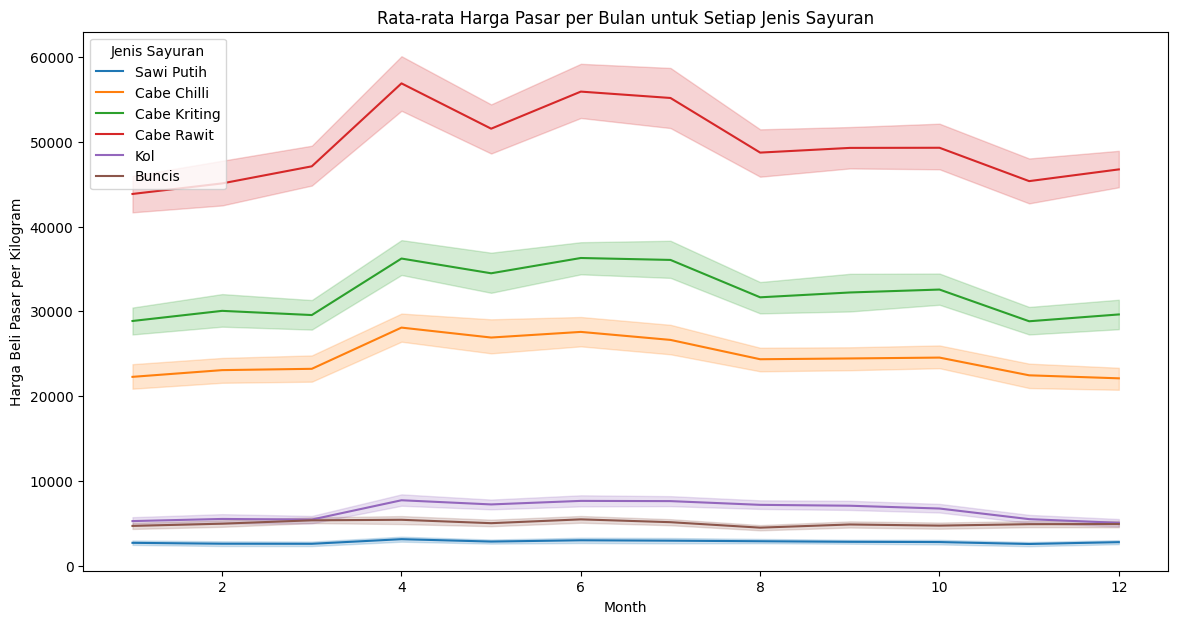

In [6]:
# Plot rata-rata harga pasar per bulan untuk setiap jenis sayuran
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Harga Beli Pasar per Kilogram', hue='Jenis Sayuran', data=data)
plt.title('Rata-rata Harga Pasar per Bulan untuk Setiap Jenis Sayuran')
plt.show()


d.  Visualisasi Tren Harga dari Waktu ke Waktu

## Data Preprocessing

a. Feature Engineering

In [7]:
# Menambahkan fitur mingguan, bulanan, kuartal
data['Bulan'] = data['Tanggal Harga'].dt.month
data['Kuartal'] = data['Tanggal Harga'].dt.quarter

# Daftar hari besar yang lebih lengkap termasuk Idul Adha, Idul Fitri, Natal, dan Tahun Baru
# Periode hari besar 2021-2023 (contoh)
hari_besar = pd.to_datetime([
    '2021-01-01', '2021-12-25', '2022-01-01', '2022-12-25',  # Tahun Baru dan Natal
    '2021-05-13', '2021-07-20', '2022-05-03', '2022-07-09',  # Idul Fitri dan Idul Adha 2021-2022
    '2023-04-22', '2023-06-29'  # Idul Fitri dan Idul Adha 2023
])

# Menambahkan fitur hari besar
data['Hari Besar'] = data['Tanggal Harga'].isin(hari_besar).astype(int)

# Menambahkan fitur jarak ke hari besar berikutnya dan sebelumnya
data['Jarak ke Hari Besar Sebelumnya'] = data['Tanggal Harga'].apply(lambda x: (x - hari_besar[hari_besar <= x]).min().days if not hari_besar[hari_besar <= x].empty else np.nan)
data['Jarak ke Hari Besar Berikutnya'] = data['Tanggal Harga'].apply(lambda x: (hari_besar[hari_besar >= x] - x).min().days if not hari_besar[hari_besar >= x].empty else np.nan)

# Menambahkan fitur lag
data['Harga Pengepul Lag 1'] = data['Harga Beli Pengepul per Kilogram'].shift(1)
data['Harga Pasar Lag 1'] = data['Harga Beli Pasar per Kilogram'].shift(1)

# Menambahkan fitur rolling mean
data['Harga Pengepul Rolling Mean'] = data['Harga Beli Pengepul per Kilogram'].rolling(window=3).mean()
data['Harga Pasar Rolling Mean'] = data['Harga Beli Pasar per Kilogram'].rolling(window=3).mean()

# Menghapus baris dengan nilai NaN yang dihasilkan oleh operasi rolling dan lag
data = data.dropna()

# Menampilkan data dengan fitur baru
data.head()

,ID,Jenis Sayuran,Tanggal Harga,Musim,Harga Beli Pengepul per Kilogram,Year,Month,Harga Beli Pasar per Kilogram,Bulan,Kuartal,Hari Besar,Jarak ke Hari Besar Sebelumnya,Jarak ke Hari Besar Berikutnya,Harga Pengepul Lag 1,Harga Pasar Lag 1,Harga Pengepul Rolling Mean,Harga Pasar Rolling Mean
2,3,Cabe Kriting,2021-01-01,Hujan,34200,2021,1,38600.0,1,1,1,0,0.0,20800.0,23800.0,19500.000000,22100.000000
3,4,Cabe Rawit,2021-01-01,Hujan,52800,2021,1,58500.0,1,1,1,0,0.0,34200.0,38600.0,35933.333333,40300.000000
4,5,Kol,2021-01-01,Hujan,1800,2021,1,2000.0,1,1,1,0,0.0,52800.0,58500.0,29600.000000,33033.333333
5,6,Buncis,2021-01-01,Hujan,1900,2021,1,2100.0,1,1,1,0,0.0,1800.0,2000.0,18833.333333,20866.666667
6,7,Sawi Putih,2021-02-01,Hujan,1500,2021,2,1700.0,2,1,0,31,101.0,1900.0,2100.0,1733.333333,1933.333333


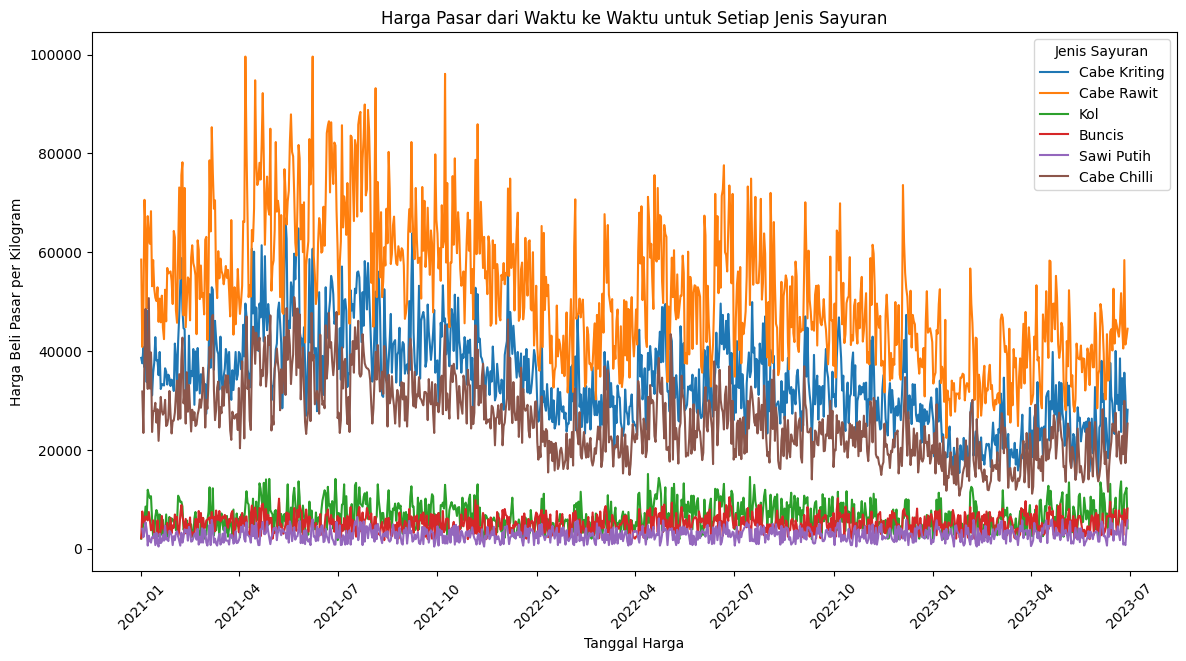

In [8]:
# Plot harga pasar dari waktu ke waktu untuk setiap jenis sayuran
plt.figure(figsize=(14, 7))
sns.lineplot(x='Tanggal Harga', y='Harga Beli Pasar per Kilogram', hue='Jenis Sayuran', data=data)
plt.title('Harga Pasar dari Waktu ke Waktu untuk Setiap Jenis Sayuran')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_2419/3323318420.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


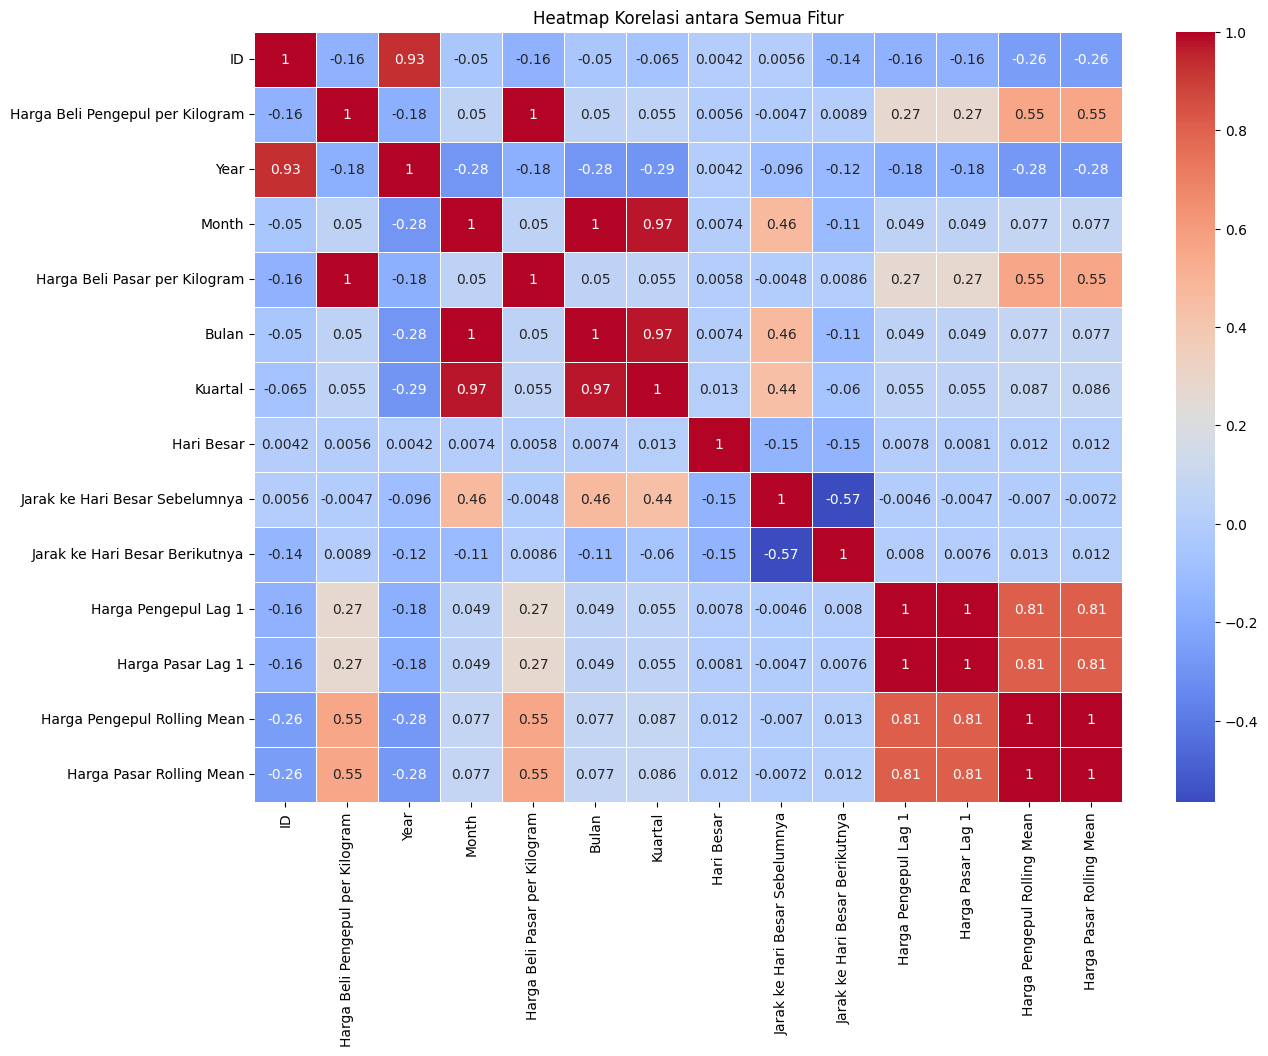

In [9]:
#Correlation Matrix Heatmap data yang sudah ditambahkan corrmax
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = data.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi antara Semua Fitur')
plt.show()

## Modeling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Memilih fitur dan target
features = ['Harga Beli Pengepul per Kilogram','Bulan', 'Kuartal', 'Hari Besar', 
            'Jarak ke Hari Besar Sebelumnya', 'Jarak ke Hari Besar Berikutnya', 
            'Harga Pengepul Lag 1', 'Harga Pasar Lag 1', 
            'Harga Pengepul Rolling Mean', 'Harga Pasar Rolling Mean']
target = 'Harga Beli Pasar per Kilogram'

# Memisahkan fitur dan target
X = data[features]
y = data[target]

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model SVR
model = SVR()
model.fit(X_train, y_train)

# Membuat prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluasi kinerja model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train, mse_test, rmse_train, rmse_test, mae_train, mae_test, r2_train, r2_test


(441880004.51140153,
 487632980.3204842,
 21020.942046240496,
 22082.413371741874,
 15814.018873608036,
 16675.637161247036,
 -0.1552789504710328,
 -0.19826163367496497)

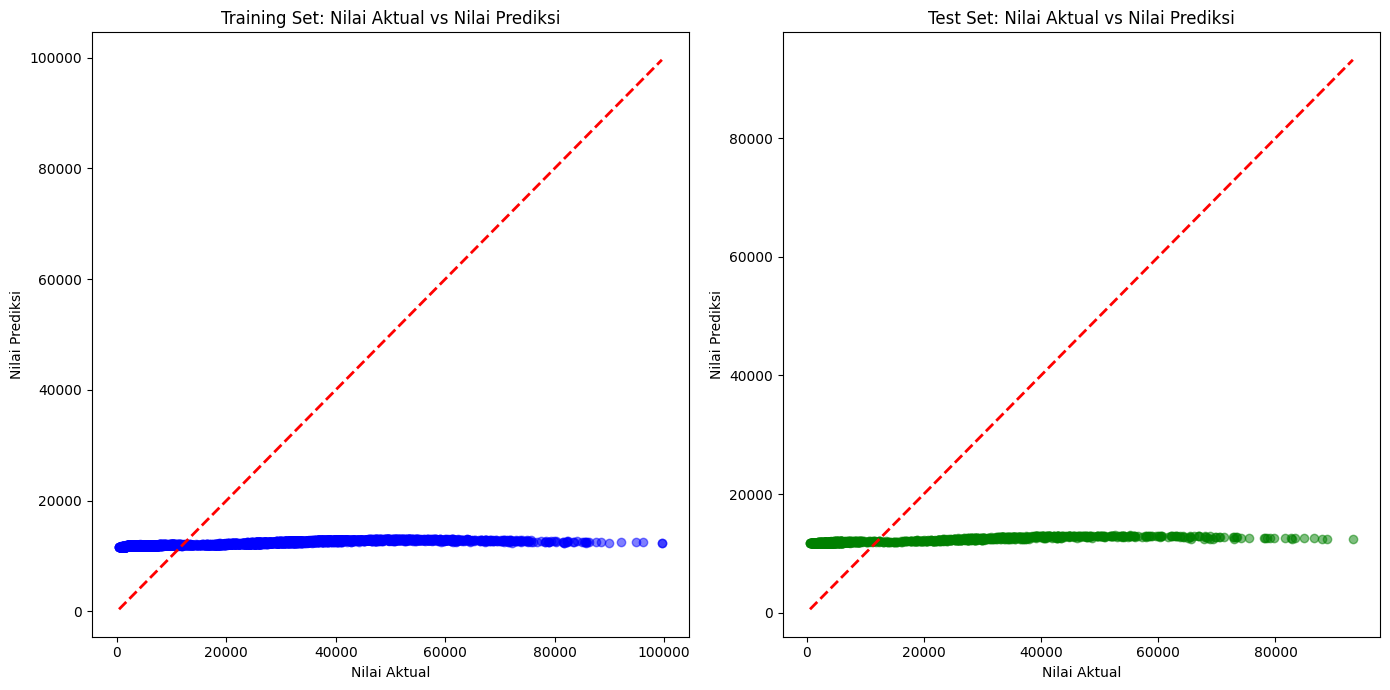

In [11]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(14, 7))

# Plot untuk training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Training Set: Nilai Aktual vs Nilai Prediksi')

# Plot untuk test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Test Set: Nilai Aktual vs Nilai Prediksi')

plt.tight_layout()
plt.show()


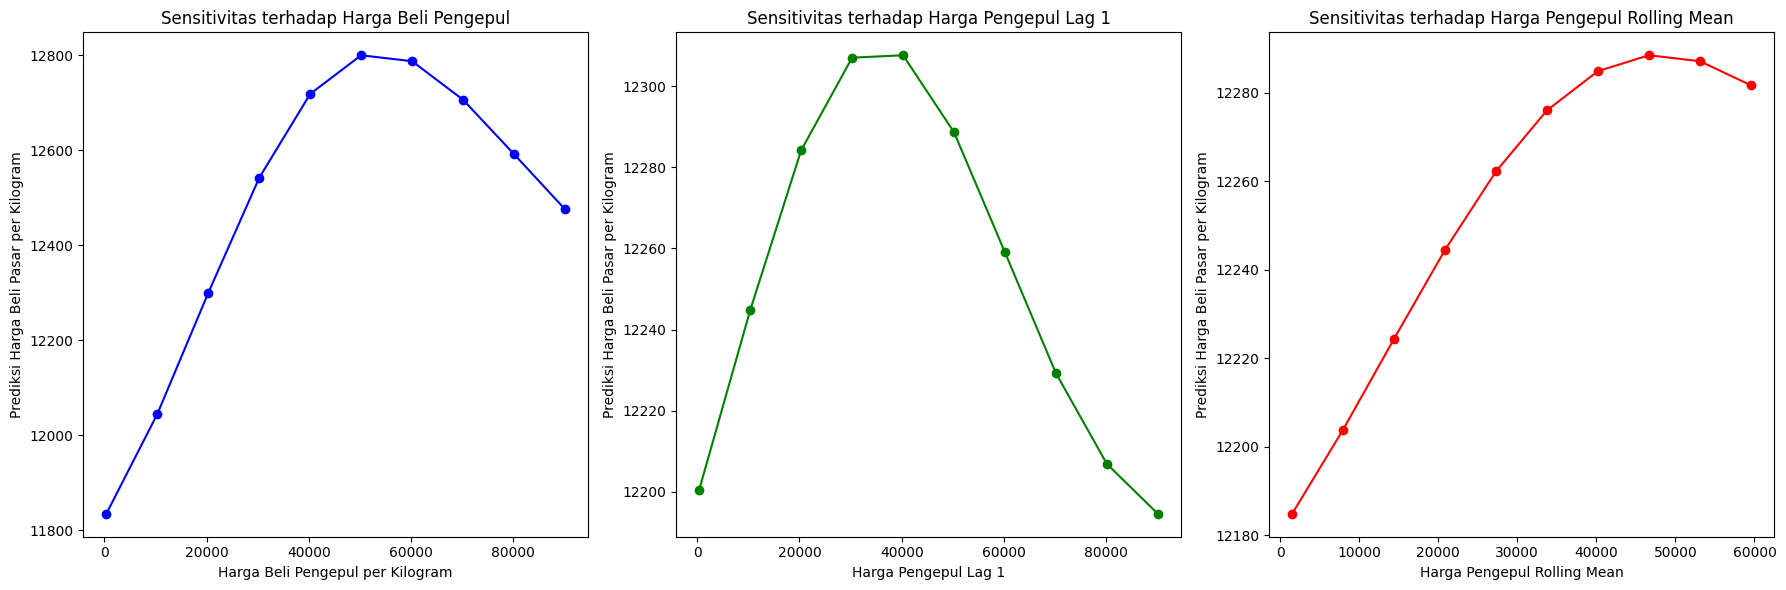

In [12]:
# Fungsi untuk melakukan analisis sensitivitas
def sensitivity_analysis(feature, values, model, X_train, y_train):
    X_temp = X_train.copy()
    sensitivity_results = []
    
    for value in values:
        X_temp[feature] = value
        y_pred = model.predict(X_temp)
        sensitivity_results.append(y_pred.mean())
        
    return sensitivity_results

# Variasi input untuk analisis sensitivitas
pengepul_variations = np.linspace(data['Harga Beli Pengepul per Kilogram'].min(), data['Harga Beli Pengepul per Kilogram'].max(), num=10)
lag_variations = np.linspace(data['Harga Pengepul Lag 1'].min(), data['Harga Pengepul Lag 1'].max(), num=10)
rolling_mean_variations = np.linspace(data['Harga Pengepul Rolling Mean'].min(), data['Harga Pengepul Rolling Mean'].max(), num=10)

# Melakukan analisis sensitivitas
sensitivity_pengepul = sensitivity_analysis('Harga Beli Pengepul per Kilogram', pengepul_variations, model, X_train, y_train)
sensitivity_lag = sensitivity_analysis('Harga Pengepul Lag 1', lag_variations, model, X_train, y_train)
sensitivity_rolling_mean = sensitivity_analysis('Harga Pengepul Rolling Mean', rolling_mean_variations, model, X_train, y_train)

# Visualisasi hasil analisis sensitivitas
plt.figure(figsize=(18, 6))

# Plot sensitivitas untuk Harga Beli Pengepul per Kilogram
plt.subplot(1, 3, 1)
plt.plot(pengepul_variations, sensitivity_pengepul, marker='o', linestyle='-', color='b')
plt.title('Sensitivitas terhadap Harga Beli Pengepul')
plt.xlabel('Harga Beli Pengepul per Kilogram')
plt.ylabel('Prediksi Harga Beli Pasar per Kilogram')

# Plot sensitivitas untuk Harga Pengepul Lag 1
plt.subplot(1, 3, 2)
plt.plot(lag_variations, sensitivity_lag, marker='o', linestyle='-', color='g')
plt.title('Sensitivitas terhadap Harga Pengepul Lag 1')
plt.xlabel('Harga Pengepul Lag 1')
plt.ylabel('Prediksi Harga Beli Pasar per Kilogram')

# Plot sensitivitas untuk Harga Pengepul Rolling Mean
plt.subplot(1, 3, 3)
plt.plot(rolling_mean_variations, sensitivity_rolling_mean, marker='o', linestyle='-', color='r')
plt.title('Sensitivitas terhadap Harga Pengepul Rolling Mean')
plt.xlabel('Harga Pengepul Rolling Mean')
plt.ylabel('Prediksi Harga Beli Pasar per Kilogram')

plt.tight_layout()
plt.show()


a. Hyperparameter Tuning dengan GridSearchCV

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Definisikan parameter grid
param_grid = {
    'kernel': ['linear', 'poly'],
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Inisialisasi SVR dan RandomizedSearchCV
svr = SVR()
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_grid,
    n_iter=10,  # Jumlah iterasi
    cv=3,       # Mengurangi jumlah fold
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Ambil subset data untuk pencarian parameter awal
n_samples = min(1000, len(X_train))  # Gunakan maksimum 1000 sampel atau seluruh dataset jika lebih kecil
indices = np.random.choice(len(X_train), n_samples, replace=False)
X_subset = X_train.iloc[indices] if isinstance(X_train, pd.DataFrame) else X_train[indices]
y_subset = y_train.iloc[indices] if isinstance(y_train, pd.Series) else y_train[indices]

# Latih model dengan random search pada subset data
random_search.fit(X_subset, y_subset)

# Dapatkan parameter terbaik
best_params = random_search.best_params_

# Latih model final dengan parameter terbaik pada seluruh data training
best_model = SVR(**best_params)
best_model.fit(X_train, y_train)

# Membuat prediksi dengan model terbaik
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Evaluasi kinerja model terbaik
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)
rmse_train_best = np.sqrt(mse_train_best)
rmse_test_best = np.sqrt(mse_test_best)
mae_train_best = mean_absolute_error(y_train, y_pred_train_best)
mae_test_best = mean_absolute_error(y_test, y_pred_test_best)
r2_train_best = r2_score(y_train, y_pred_train_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

# Print hasil
print("Best parameters:", best_params)
print("MSE (Train):", mse_train_best)
print("MSE (Test):", mse_test_best)
print("RMSE (Train):", rmse_train_best)
print("RMSE (Test):", rmse_test_best)
print("MAE (Train):", mae_train_best)
print("MAE (Test):", mae_test_best)
print("R2 Score (Train):", r2_train_best)
print("R2 Score (Test):", r2_test_best)

In [17]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'kernel': ['linear', 'poly',],
    'C': [1, 10, 100],
    'gamma': ['scale']
}

# Inisialisasi SVR dan GridSearchCV
svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Latih model dengan grid search
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Membuat prediksi dengan model terbaik
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Evaluasi kinerja model terbaik
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)
rmse_train_best = np.sqrt(mse_train_best)
rmse_test_best = np.sqrt(mse_test_best)
mae_train_best = mean_absolute_error(y_train, y_pred_train_best)
mae_test_best = mean_absolute_error(y_test, y_pred_test_best)
r2_train_best = r2_score(y_train, y_pred_train_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

best_params, mse_train_best, mse_test_best, rmse_train_best, rmse_test_best, mae_train_best, mae_test_best, r2_train_best, r2_test_best


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution
param_dist = {
    'C': uniform(1, 100),
    'gamma': uniform(0.01, 0.1),
    'epsilon': uniform(0.01, 0.1),
    'kernel': ['rbf', 'poly']
}

# Initialize the SVR model
svr = SVR()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Perform random search
random_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Get the best model
best_svr = random_search.best_estimator_

# Make predictions on the test set
y_pred_best_svr = best_svr.predict(X_test_scaled)


b. Latih Model Gradient Boosting sebagai Pembanding

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Inisialisasi model GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Latih model
gb.fit(X_train_scaled, y_train)

# Buat prediksi pada set pengujian
y_pred_gb = gb.predict(X_test_scaled)


## Evaluation

a. Hitung Metrik Evaluasi untuk Kedua Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Fungsi untuk menghitung dan mencetak metrik
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print()

# Metrik evaluasi untuk SVR
print_metrics(y_test, y_pred_best_svr, "Best SVR")

# Metrik evaluasi untuk Gradient Boosting
print_metrics(y_test, y_pred_gb, "Gradient Boosting")

b. Perhitungan Manual Metrik

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

In [ ]:
# Contoh perhitungan manual MSE untuk beberapa data
n = 10  # Jumlah data yang akan digunakan
mse_manual = sum((y_test.values[:n] - y_pred_best_svr[:n]) ** 2) / n
print(f"Manual MSE (contoh): {mse_manual}")

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}i)^2}{\sum{i=1}^{n} (y_i - \bar{y})^2}$$ 

In [ ]:
# Contoh perhitungan manual R² untuk beberapa data
y_mean = y_test.values[:n].mean()
ss_total = sum((y_test.values[:n] - y_mean) ** 2)
ss_res = sum((y_test.values[:n] - y_pred_best_svr[:n]) ** 2)
r2_manual = 1 - (ss_res / ss_total)
print(f"Manual R² (contoh): {r2_manual}")

c. Viualisasi Metrik Evaluasi

In [ ]:
# Visualisasi MSE
plt.figure(figsize=(8, 5))
sns.barplot(x=['SVR', 'Gradient Boosting'], y=[mse_best_svr, mse_gb])
plt.title('Mean Squared Error')
plt.ylabel('Value')
plt.show()

In [ ]:
# Visualisasi R-squared
plt.figure(figsize=(8, 5))
sns.barplot(x=['SVR', 'Gradient Boosting'], y=[r2_best_svr, r2_gb])
plt.title('R-squared')
plt.ylabel('Value')
plt.show()

d. Plot harga Aktual vs Prediksi 

In [ ]:
# Gabungkan data aktual dan prediksi untuk SVR
results_svr = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best_svr,
    'Year': test_data['Year'],
    'Month': test_data['Month'],
    'Jenis Sayuran': test_data.filter(like='Jenis Sayuran_').idxmax(axis=1).str.replace('Jenis Sayuran_', '')
})

results_svr['Tanggal Harga'] = pd.to_datetime(results_svr['Year'].astype(str) + '-' + results_svr['Month'].astype(str) + '-01')

# Plot harga aktual vs prediksi untuk SVR
plt.figure(figsize=(14, 7))

# Plot harga aktual
sns.lineplot(data=results_svr, x='Tanggal Harga', y='Actual', hue='Jenis Sayuran', marker='o', legend=False)

# Plot harga prediksi
sns.lineplot(data=results_svr, x='Tanggal Harga', y='Predicted', hue='Jenis Sayuran', marker='x', linestyle='--')

# Sesuaikan judul dan label
plt.title('Harga Aktual vs Prediksi (SVR)')
plt.ylabel('Price (IDR)')
plt.xlabel('Date')
plt.xticks(rotation=45)

# Tampilkan legenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:len(results_svr['Jenis Sayuran'].unique())], labels[0:len(results_svr['Jenis Sayuran'].unique())])

plt.show()


## Deployment

a. Simpan Model Terbaik (SVR)

In [ ]:
import joblib

# Simpan model SVR terbaik yang sudah dilatih
joblib.dump(best_svr, 'best_svr_model.pkl')

# Simpan scaler
joblib.dump(scaler, 'scaler.pkl')


b. Buat Data untuk Prediksi Masa Depan (Setiap 3 Bulan Sekali)

In [ ]:
import pandas as pd

# Membuat tanggal masa depan untuk setiap 3 bulan di tahun 2024
future_dates = pd.date_range(start='2024-01-01', periods=4, freq='3M')

# Daftar jenis sayuran
vegetables = data['Jenis Sayuran'].unique()

# Menghasilkan dataset untuk prediksi masa depan
forecast_results = pd.DataFrame()

for vegetable in vegetables:
    future_data_list = []
    for date in future_dates:
        season = 'Kemarau' if date.month in [6, 7, 8, 9] else 'Hujan'
        future_data_list.append({
            'Year': date.year,
            'Month': date.month,
            'Jenis Sayuran': vegetable,
            'Season': season,
            'Tanggal Harga': date
        })

    future_data = pd.DataFrame(future_data_list)

    # One-hot encode variabel kategorikal
    future_data_encoded = pd.get_dummies(future_data)
    future_data_encoded = future_data_encoded.reindex(columns=X_train.columns, fill_value=0)

    # Standarisasi fitur
    future_data_scaled = scaler.transform(future_data_encoded)

    # Membuat prediksi untuk data masa depan
    future_predictions = best_svr.predict(future_data_scaled)

    # Menyiapkan hasil untuk dashboard
    forecast = pd.DataFrame({
        'Tanggal Harga': future_data['Tanggal Harga'],
        'Jenis Sayuran': vegetable,
        'Harga Beli Pasar per Kilogram': future_predictions
    })

    forecast_results = pd.concat([forecast_results, forecast])

# Menyimpan hasil prediksi ke dalam file CSV
forecast_results.to_csv('forecast_results.csv', index=False)


In [ ]:
# Tentukan sayuran terbaik berdasarkan harga rata-rata tertinggi
best_vegetable = forecast_results.groupby('Jenis Sayuran')['Harga Beli Pasar per Kilogram'].mean().idxmax()
best_vegetable


In [ ]:
# Tentukan harga tertinggi dari sayuran terbaik
best_price_performance = forecast_results.groupby('Jenis Sayuran')['Harga Beli Pasar per Kilogram'].mean().max()
best_price_performance


In [ ]:
# Hitung deviasi standar harga untuk setiap jenis sayuran
std_prices = forecast_results.groupby('Jenis Sayuran')['Harga Beli Pasar per Kilogram'].std()

# Tentukan sayuran yang direkomendasikan untuk ditanam (dengan deviasi standar terendah)
to_plant = std_prices.nsmallest(2).index.tolist()

# Tentukan sayuran yang sebaiknya dihindari (dengan deviasi standar tertinggi)
to_avoid = std_prices.nlargest(2).index.tolist()

# Simpan informasi tambahan
additional_info = {
    'best_vegetable': forecast_results.groupby('Jenis Sayuran')['Harga Beli Pasar per Kilogram'].mean().idxmax(),
    'best_price_performance': forecast_results.groupby('Jenis Sayuran')['Harga Beli Pasar per Kilogram'].mean().max(),
    'seasons': {
        'Januari - Maret': 'Musim Hujan',
        'April - Juni': 'Transisi ke Musim Kemarau',
        'Juli - September': 'Musim Kemarau',
        'Oktober - Desember': 'Transisi ke Musim Hujan'
    },
    'plant_recommendations': {
        'to_plant': to_plant,
        'to_avoid': to_avoid
    }
}

# Simpan informasi tambahan ke file pkl
joblib.dump(additional_info, 'additional_info.pkl')